# Feature Engineering
In this script we will create, modify and convert to logs, variable that we deem are necessary to explain the cross_sell_success. 


## Importing and loading essentials

In [18]:
# importing python's 101
import pandas  as pd
import numpy   as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)


# loading dataset
file = "./datasets/chef_dataset_5.xlsx"
chef = pd.read_excel(io = file)

chef.columns

Index(['revenue', 'cross_sell_success', 'name', 'email', 'first_name',
       'family_name', 'total_meals_ordered', 'unique_meals_purch',
       'contacts_w_customer_service', 'product_categories_viewed',
       'avg_time_per_site_visit', 'mobile_number', 'cancellations_before_noon',
       'cancellations_after_noon', 'tastes_and_preferences', 'pc_logins',
       'mobile_logins', 'weekly_plan', 'early_deliveries', 'late_deliveries',
       'package_locker', 'refrigerated_locker', 'avg_prep_vid_time',
       'avg_order_size', 'master_classes_attended', 'median_meal_rating',
       'avg_clicks_per_visit', 'total_photos_viewed', 'log_revenue',
       'has_cancel_bnoon', 'has_weekly_plan', 'has_early_deliveries',
       'has_late_deliveries', 'has_master_classes_attended',
       'has_total_photos_viewed', 'total_cancellations', 'junk', 'personal',
       'professional', 'unknown', 'andy', 'female', 'male', 'mostly_male',
       'gender_unknown'],
      dtype='object')

In [19]:
chef = chef.drop(['total_cancellations'] , axis = 1)

## Exploration of the Distribution

In [20]:
def view_distribution(column):
    
    # Histogram regular revenue
    plt.subplot(2,1,1)
    plt.hist( x = column,
                bins = 'fd')

    plt.title("Normal Distribution")
    
    plt.subplot(2,1,2)
    plt.hist( x = np.log10(column),
                bins = 'fd')

    plt.title("Log Distribution")
    
    plt.tight_layout()
    
    plt.show()


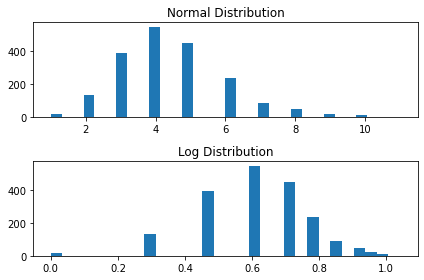

In [5]:
view_distribution(chef['avg_order_size'])

In [21]:
# Converting Relevant Columns To Log10
chef['log_total_meals_ordered'] = np.log10(chef['total_meals_ordered'])
chef['log_unique_meals_purch'] = np.log10(chef['unique_meals_purch'])
chef['log_contacts_w_customer_service'] = np.log10(chef['contacts_w_customer_service'])
chef['log_avg_time_per_site_visit'] = np.log10(chef['avg_time_per_site_visit'])
chef['log_avg_prep_vid_time'] = np.log10(chef['avg_prep_vid_time'])
chef['log_median_meal_rating'] = np.log10(chef['median_meal_rating'])
chef['log_avg_clicks_per_visit'] = np.log10(chef['avg_clicks_per_visit'])
chef['log_avg_order_size'] = np.log10(chef['avg_order_size'])



## Creating New Features

In [22]:
chef['total_logins'] = chef['pc_logins'] + chef['mobile_logins']
chef['avg_total_time'] = chef['avg_prep_vid_time'] + chef['avg_time_per_site_visit']
chef['log_avg_total_time'] = np.log10(chef['avg_total_time'])



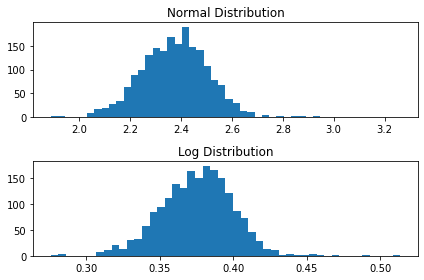

In [8]:
view_distribution(chef['log_avg_total_time'])

## Exporting the Dataset

In [ ]:
chef.to_excel('./datasets/chef_dataset_9.xlsx', index = False)

## Removing High P-Values

In [23]:
chef_data = chef.drop(['revenue' , 'cross_sell_success'], axis = 1)
chef_target = chef.loc[: , 'cross_sell_success']

In [24]:
x_train, x_test, y_train, y_test = train_test_split(chef_data,
                                                    chef_target,
                                                    test_size = 0.25,
                                                    random_state = 219,
                                                    stratify = chef_target)

In [25]:
for val in chef.columns:
    print(f"{val} +")

revenue +
cross_sell_success +
name +
email +
first_name +
family_name +
total_meals_ordered +
unique_meals_purch +
contacts_w_customer_service +
product_categories_viewed +
avg_time_per_site_visit +
mobile_number +
cancellations_before_noon +
cancellations_after_noon +
tastes_and_preferences +
pc_logins +
mobile_logins +
weekly_plan +
early_deliveries +
late_deliveries +
package_locker +
refrigerated_locker +
avg_prep_vid_time +
avg_order_size +
master_classes_attended +
median_meal_rating +
avg_clicks_per_visit +
total_photos_viewed +
log_revenue +
has_cancel_bnoon +
has_weekly_plan +
has_early_deliveries +
has_late_deliveries +
has_master_classes_attended +
has_total_photos_viewed +
junk +
personal +
professional +
unknown +
andy +
female +
male +
mostly_male +
gender_unknown +
log_total_meals_ordered +
log_unique_meals_purch +
log_contacts_w_customer_service +
log_avg_time_per_site_visit +
log_avg_prep_vid_time +
log_median_meal_rating +
log_avg_clicks_per_visit +
log_avg_order_siz

In [59]:
# merging X_train and y_train so that they can be used in statsmodels
chef_train = pd.concat([x_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """cross_sell_success ~ total_meals_ordered +
contacts_w_customer_service +
mobile_number +
cancellations_before_noon +
tastes_and_preferences +
pc_logins +
early_deliveries +
has_early_deliveries +
junk +
log_total_meals_ordered    """,
                                data = chef_train)


# Step 2: fit the model based on the data
results = lm_best.fit()



# Step 3: analyze the summary output
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     cross_sell_success   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     23.27
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           6.03e-41
Time:                        21:05:26   Log-Likelihood:                -850.69
No. Observations:                1459   AIC:                             1723.
Df Residuals:                    1448   BIC:                             1782.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [58]:
# Creating variables with acceptable p-values
x_variables = ['total_meals_ordered' 
,'contacts_w_customer_service' 
,'mobile_number' 
,'cancellations_before_noon' 
,'tastes_and_preferences' 
,'pc_logins' 
,'early_deliveries' 
,'has_early_deliveries' 
,'junk' 
'log_total_meals_ordered' ]